In [1]:
!ls

001_repaso_python.ipynb
002_mls.ipynb
003_RLM_aplicacion.ipynb
004_multicolinealidad.ipynb
005_analisis_residuos.ipynb
006_conjuntos_entrenamiento_validacion.ipynb
007_heterocedasticidad.ipynb
Advertising.csv
FaceData
GE.csv
Prestige.csv
README.md
all_perth_310121.csv
bad-rp.png
exm_dep_par_1.ipynb
good-rp.png
pop.csv


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [3]:
ruta_imagenes = './FaceData/'
side = 30
size = (side, side)

imagenes = []

for nombre_archivo in os.listdir(ruta_imagenes):
    ruta = os.path.join(ruta_imagenes, nombre_archivo) # definimos la ruta de la imagen
    imagen = Image.open(ruta) # leer la imagen
    imagen = imagen.resize(size) # redimensionamos la imagen
    imagen = imagen.convert('L') # Transformar las imagenes a escala de grises
    fila = np.array(imagen).flatten() # aplastamos la imagen
    edad = float(nombre_archivo.split('_')[0]) # se extrae la edad del nombre del archivo
    fila = np.append(fila, np.array(edad)) # concatenamos la edad a la fila
    imagenes.append(fila)

In [4]:
df = pd.DataFrame(imagenes)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,900
0,89.0,96.0,83.0,41.0,18.0,15.0,17.0,18.0,19.0,34.0,...,82.0,86.0,93.0,98.0,98.0,68.0,101.0,153.0,169.0,9.0
1,69.0,96.0,139.0,169.0,171.0,181.0,195.0,201.0,214.0,214.0,...,232.0,232.0,230.0,229.0,233.0,230.0,217.0,215.0,210.0,1.0
2,13.0,31.0,24.0,34.0,22.0,23.0,36.0,62.0,115.0,179.0,...,180.0,172.0,164.0,152.0,135.0,62.0,7.0,12.0,10.0,16.0
3,67.0,69.0,73.0,79.0,84.0,93.0,95.0,101.0,110.0,122.0,...,12.0,32.0,71.0,104.0,130.0,140.0,139.0,138.0,132.0,1.0
4,22.0,22.0,25.0,32.0,46.0,64.0,75.0,85.0,91.0,100.0,...,0.0,0.0,0.0,2.0,10.0,8.0,1.0,0.0,0.0,26.0


In [5]:
df.shape

(9780, 901)

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
#df[side*side], lambda_value = boxcox(df[side*side])
#print(lambda_value)

df[side*side] = np.log(df[side*side])

#df[side*side] = np.sqrt(df[side*side])

#df[side*side] = 1 / df[side*side].to_numpy()

Y = df[side*side]
X = df.drop(columns=[side*side])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
Y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(Y_test, Y_pred)

0.7143993723656991

In [15]:
import matplotlib.pyplot as plt

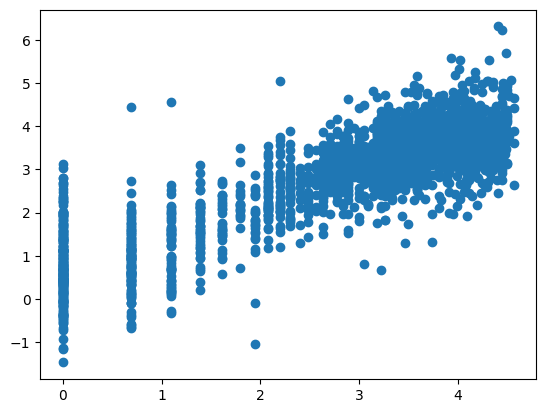

In [16]:
plt.scatter(Y_test, Y_pred)

In [ ]:
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

Text(0.5, 1.0, '1.3862943611198906 vs 3.303114034053522')

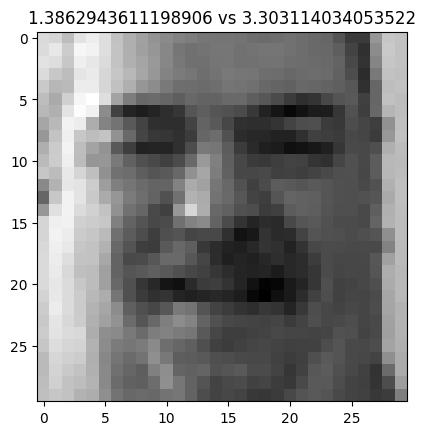

In [17]:
i = 300
imagen_aplastada = X_test.iloc[i][:]
edad_real = Y_test[i]
edad_prediccion = Y_pred[i]

plt.imshow(imagen_aplastada.to_numpy().reshape(size), cmap='gray')
plt.title(str(edad_real) + ' vs ' + str(edad_prediccion))